In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv('/content/car_age_price.csv')

In [70]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [72]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [73]:
x = data.drop('Price', axis=1)
y =data['Price']

In [74]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [75]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [76]:
corr_matrix = data.corr()

[]

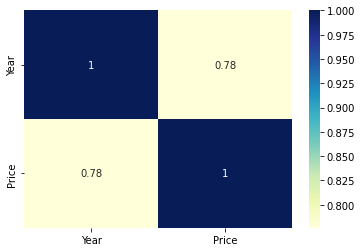

In [77]:
sns.heatmap(corr_matrix, annot = True, cmap='YlGnBu')
plt.plot()

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)

In [79]:
type(x_test)

pandas.core.frame.DataFrame

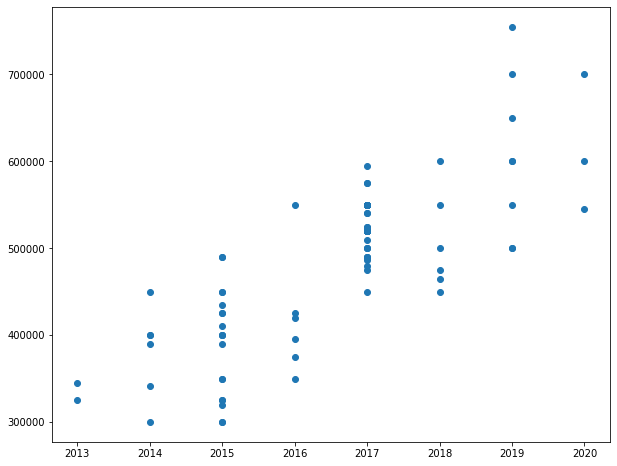

In [98]:
plt.figure(figsize =(10,8))
plt.scatter(x_train, y_train)
plt.show()

# Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(x_train,y_train)
prediction = model.predict(x_test)

In [93]:
prediction

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [94]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error  =', mean_squared_error(y_test, prediction))
print('R Squared Value =', r2_score(y_test, prediction))

Mean Squared Error  = 4326906256.829671
R Squared Value = 0.36759313425902185


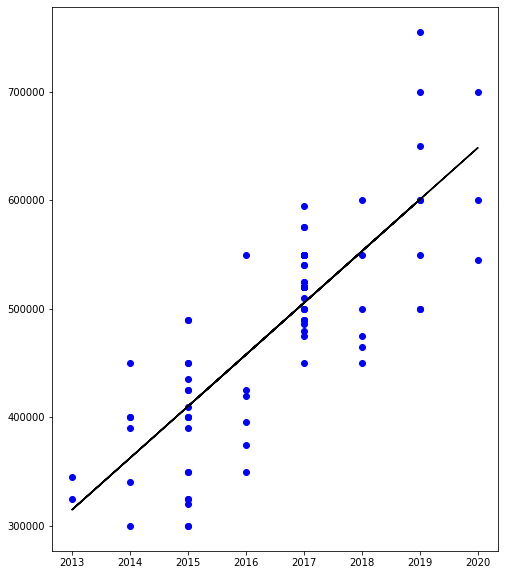

In [100]:
plt.figure(figsize =(8, 10))
plt.scatter(x_train, y_train,color='b') 
plt.plot(x_test, prediction,color='k')
plt.show()

## Value Predicted for year **2022**

In [83]:
x1_test = pd.DataFrame({'Year':[2022]})
pred_y = model.predict(x1_test)
pred_y

array([743601.61594504])

# Lasso Regression

In [102]:
from sklearn.linear_model import Lasso

In [103]:
model_lasso = Lasso(alpha = 1)
model_lasso.fit(x_train, y_train)
y_pred1 = model_lasso.predict(x_test)

In [104]:
y_pred1

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [105]:
print('Mean Squared Error  =', mean_squared_error(y_test, y_pred1))
print('R Squared Value =', r2_score(y_test, y_pred1))

Mean Squared Error  = 4326859771.015669
R Squared Value = 0.3675999284778446


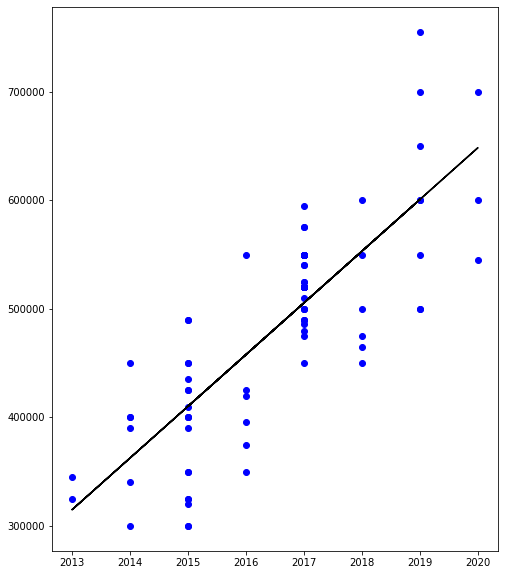

In [106]:
plt.figure(figsize =(8, 10))
plt.scatter(x_train, y_train,color='b') 
plt.plot(x_test, y_pred1,color='k')
plt.show()

## Value Predicted for year **2022**

In [107]:
x1_test_l = pd.DataFrame({'Year':[2022]})
pred_y_l = model_lasso.predict(x1_test_l)
pred_y_l

array([743599.37427144])